In [130]:
%matplotlib inline

from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.display import clear_output, display, HTML

import cv2
import cv
import numpy as np
import matplotlib.pyplot as plt
import urllib 

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [8]:
boxes_intensity_video_url="ftp://178.62.194.236/boxes/intensity_lossless.avi"
boxes_filename="boxes.avi"
urllib.urlretrieve(boxes_intensity_video_url, boxes_filename)

('boxes.avi', <mimetools.Message instance at 0x7fde046adef0>)

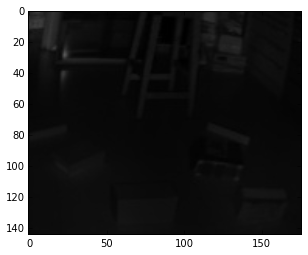

In [11]:
boxes_video = cv2.VideoCapture(boxes_filename)
_, first_frame = boxes_video.read()
plt.imshow(first_frame)

In [41]:
gray_8 =  cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
corners=np.array(0)
qualityLevel=0.1
minDistance=0
maxCorners=100
corners = cv2.goodFeaturesToTrack(image=gray_8, 
                                    qualityLevel=qualityLevel, minDistance=1,
                                      maxCorners=maxCorners)
corners =  corners.reshape(-1, 2)

In [62]:
WHITE=(0xff, 0xff, 0xff)
def add_markers(image, markers):
    new=image.copy()
    for i in markers:
        x,y = i.ravel()
        cv2.circle(new, (x,y), radius=1, color=WHITE, thickness=1)
    return new

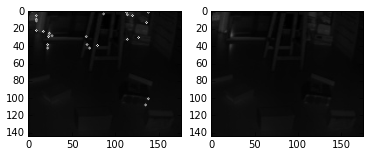

In [67]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(add_markers(first_frame, corners))
fig.add_subplot(1,2,2)
plt.imshow(first_frame)

In [141]:
def apply_shi_thomasi(**args):
    qualityLevel=args['quality_level']
    minDistance=args['min_distance']
    maxCorners=args['max_corners']

    boxes_video.set(cv.CV_CAP_PROP_POS_MSEC, args['from_ms'])

    grid_size = (args['frame_num']/2, 2)
    fig = plt.figure()
    dim=args['image_dim']
    fig.set_size_inches(1.3*dim, 1*dim/2*grid_size[0])

    for i in range(1, grid_size[0]*grid_size[1]+1):
        ok, img = boxes_video.read()
        if not ok:
            break
        img_8 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        corners = cv2.goodFeaturesToTrack(image=img_8, 
                                        qualityLevel=qualityLevel, minDistance=1,
                                          maxCorners=maxCorners)
        if corners is not None:
            corners =  corners.reshape(-1, 2)
            img =  add_markers(img, corners)
        fig.add_subplot(grid_size[0], grid_size[1], i)
        plt.imshow(img)

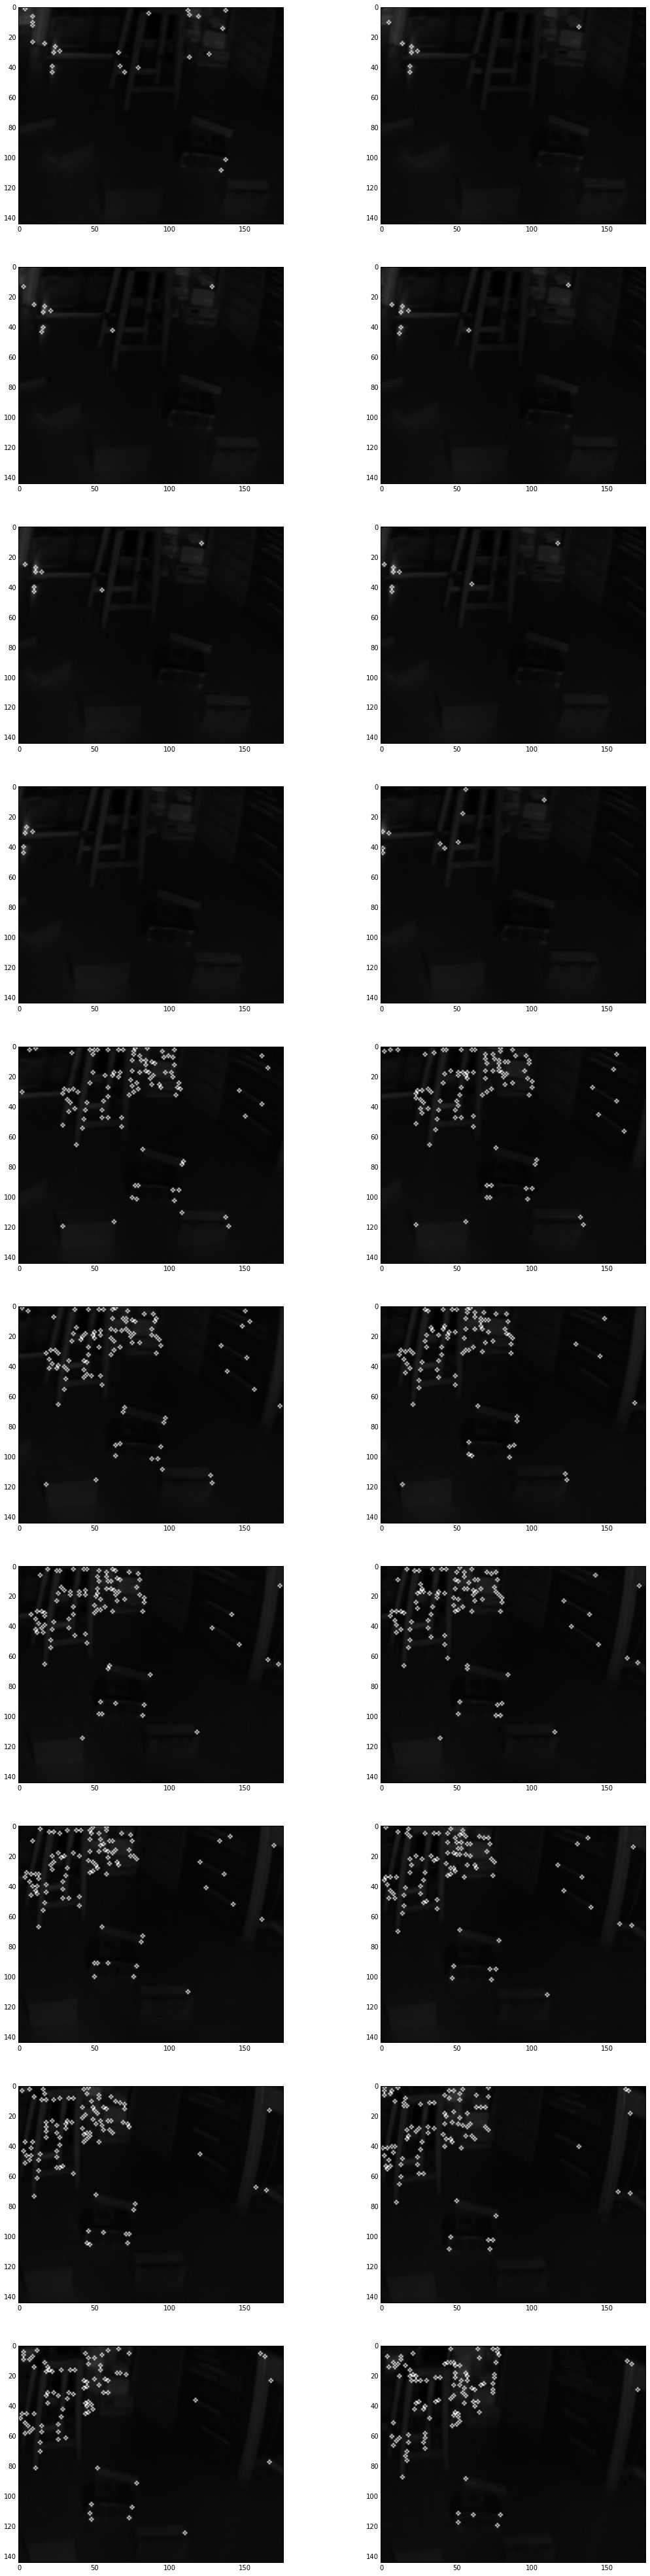

In [142]:
i = interact(apply_shi_thomasi,
         quality_level=(0.1, 1, 0.05 ),
         min_distance=(0, 100, 1),
         max_corners=(1, 200, 1),
         from_ms=(0, 100*1000, 200),
         frame_num=(2, 40, 2),
         image_dim=(2, 20, 1))